In [33]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Open the run 2 and run 3 files
file2 = ROOT.TFile("pt_dists.root")
file3 = ROOT.TFile("pt_dists_run3.root")

In [36]:
# These are the histogram names (suppressing a common h_")
histNames = ['pi0', 'rho', 'omega', 'phi', 'eta', 'etap']

In [37]:
# Get the histograms in two lists
lh2 = []
lh3 = []
for n in histNames:
    lh2.append(file2.Get("h_"+n))
    lh3.append(file3.Get("h_"+n))

# Get the bin contents and the bin edges into their own lists 
cont2 = []
bins2 = []
cont3 = []
bins3 = []
for i in range(len(histNames)):
    h2 = lh2[i]
    h3 = lh3[i]
    cont2.append([h2.GetBinContent(i) for i in range(1, h2.GetNbinsX()+1)])
    cont3.append([h3.GetBinContent(i) for i in range(1, h3.GetNbinsX()+1)])
    bins2.append([h2.GetBinLowEdge(i) for i in range(1, h2.GetNbinsX()+2)])
    bins3.append([h3.GetBinLowEdge(i) for i in range(1, h3.GetNbinsX()+2)])



In [38]:
# Sanity check....are the bis the same for the same histogram
# Also...get the bin centers
binsc = []
for b2,b3 in zip(bins2,bins3):
    temp2 = np.array(b2)
    temp3 = np.array(b3)
    diff  = np.abs(temp2-temp3)
    print(np.amax(diff))
    binsc.append(  0.5 * (temp2[1:] + temp2[:-1]))

0.0
0.0
0.0
0.0
0.0
0.0


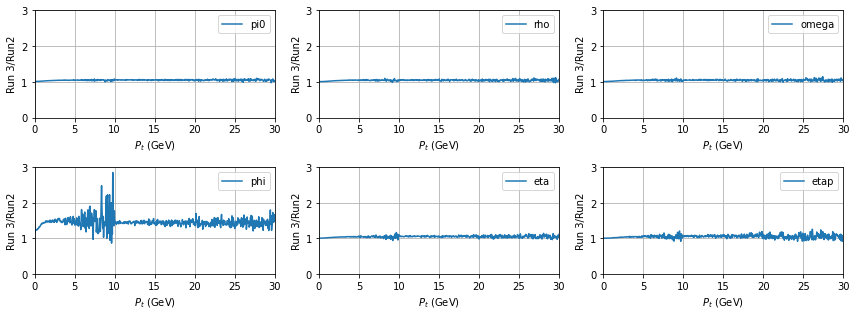

In [51]:
ipl = 1
figure = plt.figure(figsize=(12, 4.5))
for c2,c3,b,n in zip(cont2,cont3,binsc,histNames):
    ax    = plt.subplot(230+ipl)
    ipl   = ipl+1
    ax.plot(b, np.array(c3)/np.array(c2), label=n)
    ax.set_xlim(0,30)
    ax.set_ylim(0,3)
    ax.legend()
    ax.grid()
    ax.set_xlabel("$P_t$ (GeV)")
    ax.set_ylabel("Run 3/Run2")
plt.tight_layout()